### Set session

In [12]:
name = 'ANM1'
session = '20240214_d9'
num_trials = 131
threshold_shift = 0.05

### imports

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from common.select_trials import select_hit_trials, select_custom_hit_trials
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.set_matplotlib_settings import set_matplotlib_multiplot_settings
from hit_movements.get_movement_thresholds import get_movement_thresholds

### Setup folders

In [14]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscriminationData/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, arduino, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
HitMovements_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
Jerk_folder = "../Data_Copy/AnalysisData/"+name+"/Jerk_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/SingleMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (132, 7)
MTXTrialType shape: (1, 1)
number of trials: 132
movement_baseline for all trials should be the same:  0.7570869990224832
mvt threshold:  0.5 + movement_baseline =  1.257086999022483
nomvt threshold:  0.15 + movement_baseline =  0.9070869990224832
mkdir: ../Data_Copy/AnalysisData/ANM1/SingleMovements_ANM1_20240214_d9/: File exists


In [15]:
hit_trials = select_custom_hit_trials(HitMovements_folder)
#hit_trials = select_hit_trials(respMTX, num_trials)

53  hit trials in this session.


### Plot all single movements

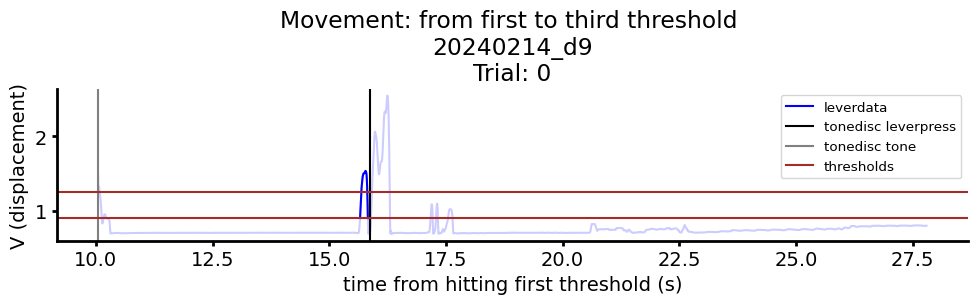

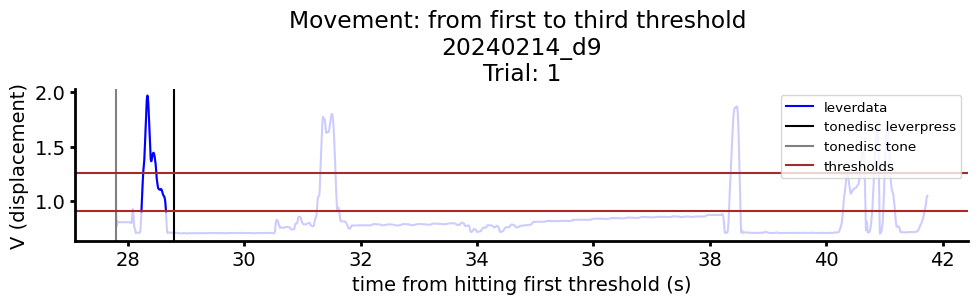

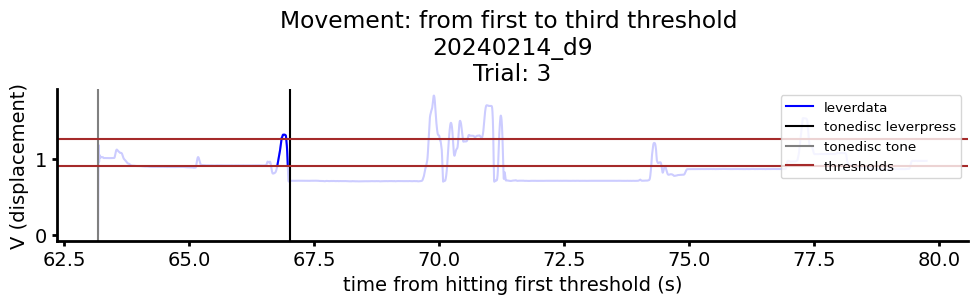

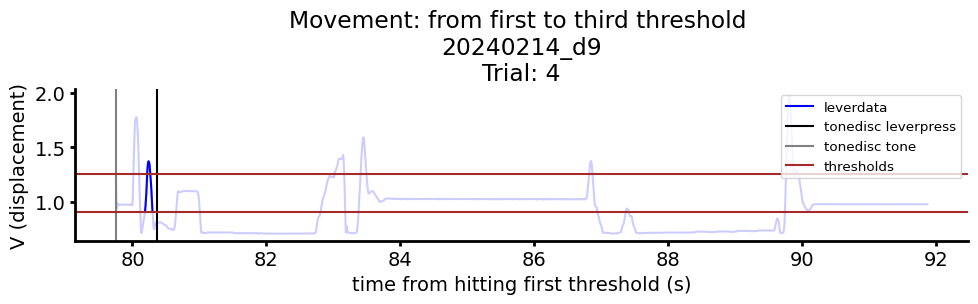

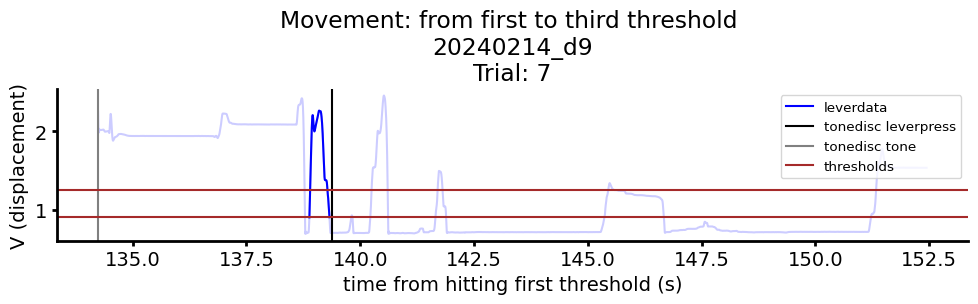

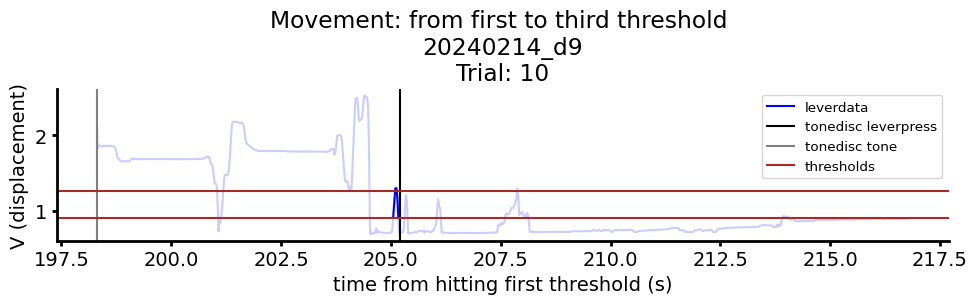

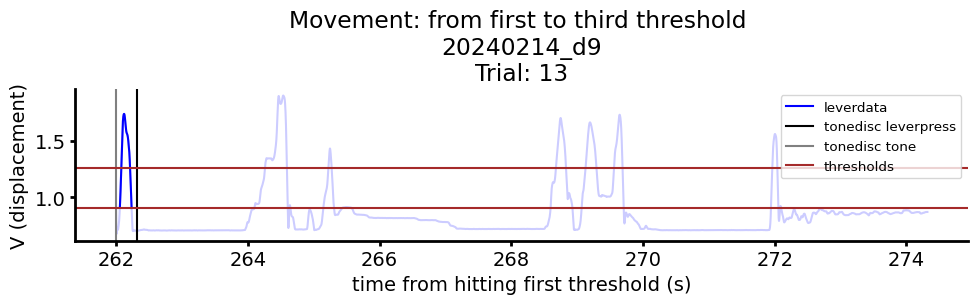

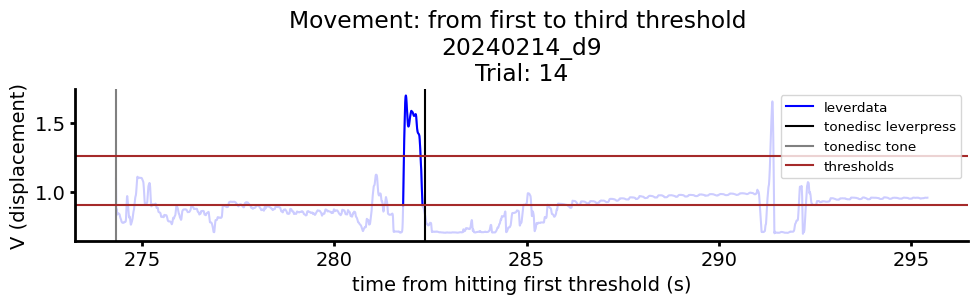

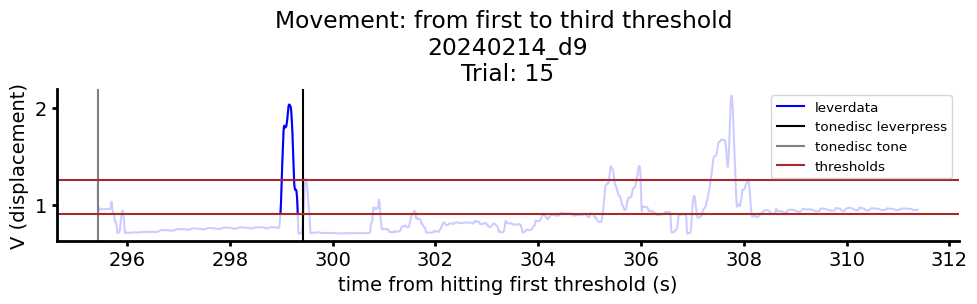

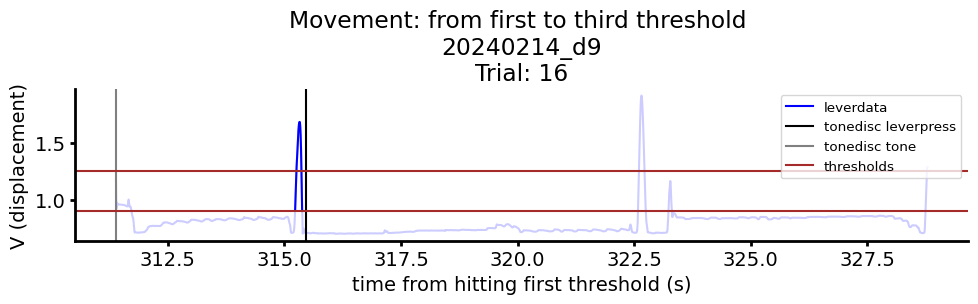

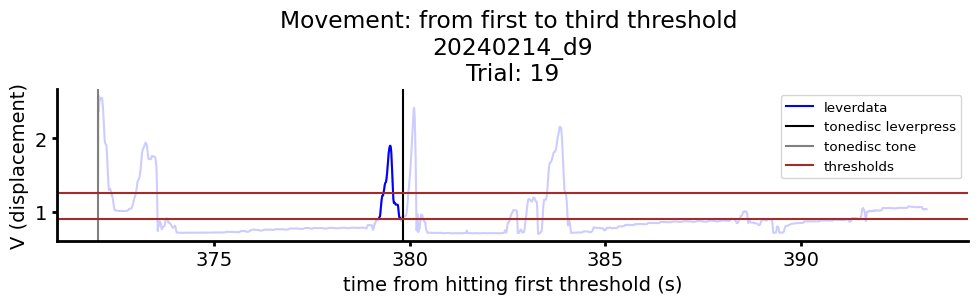

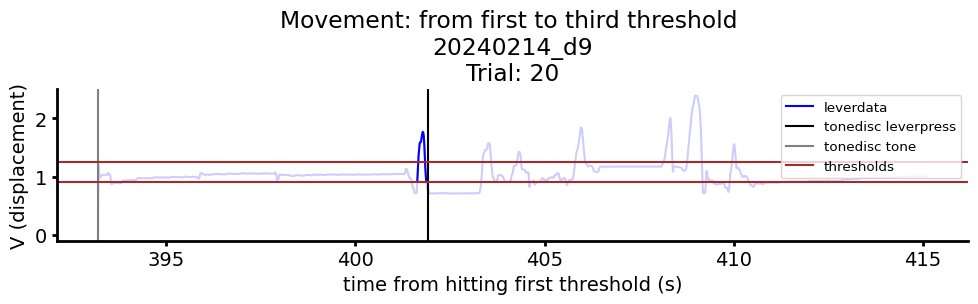

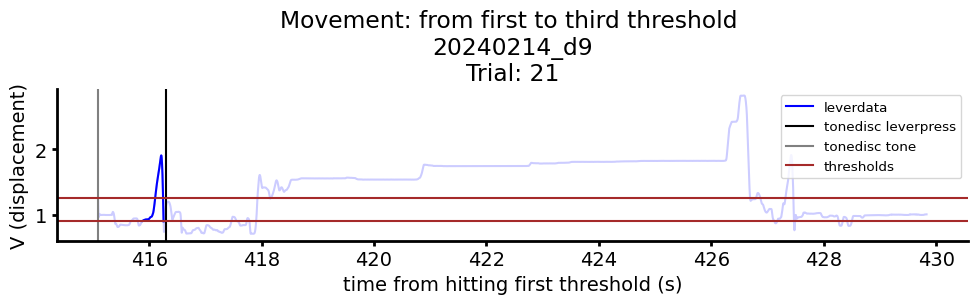

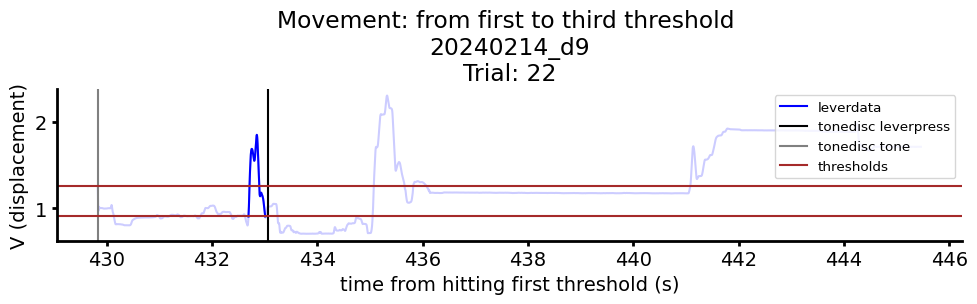

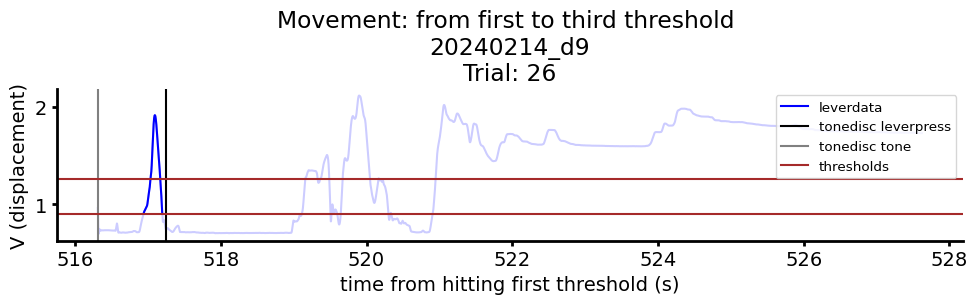

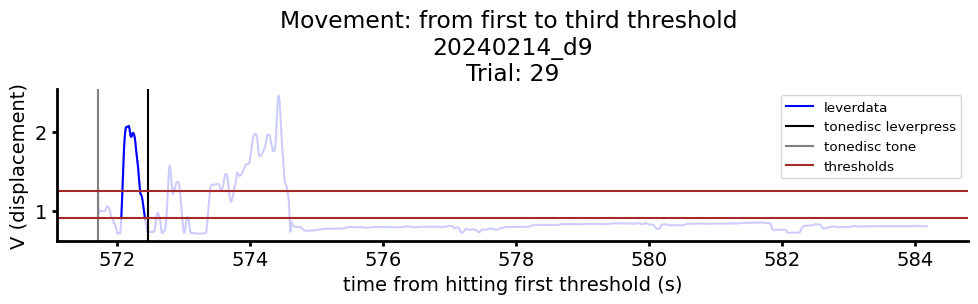

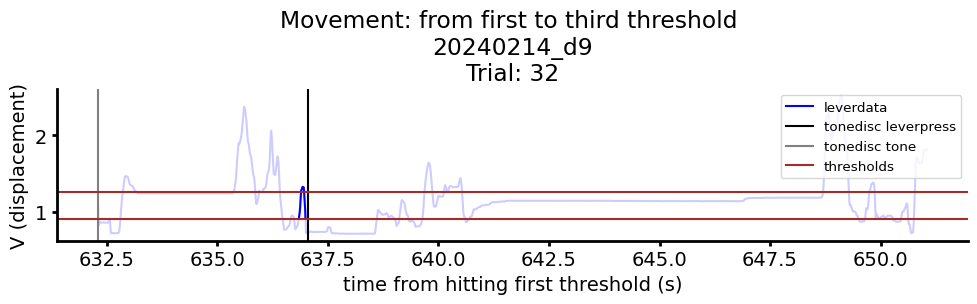

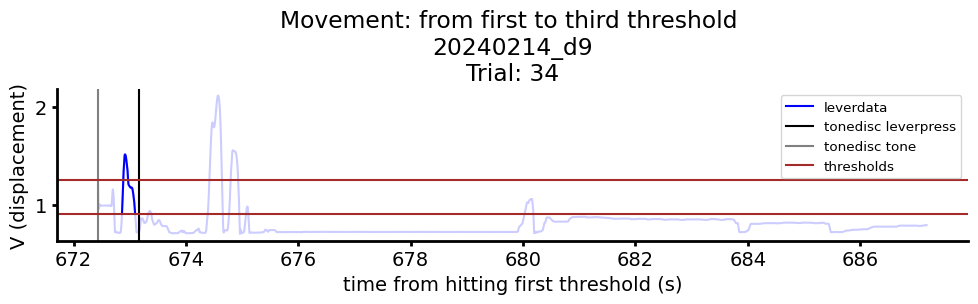

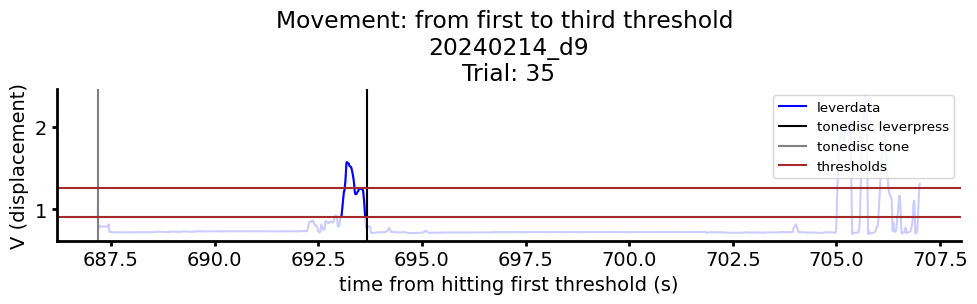

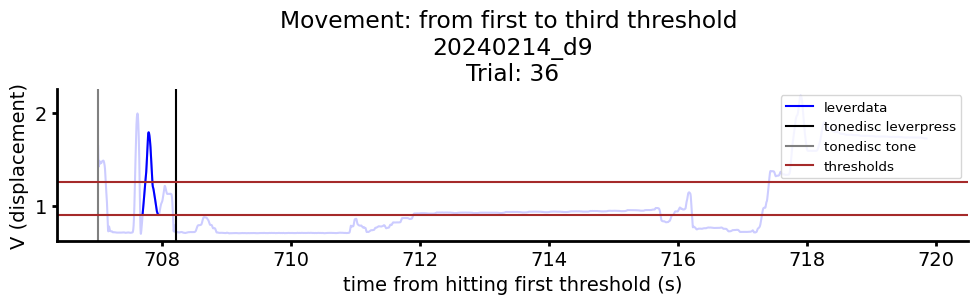

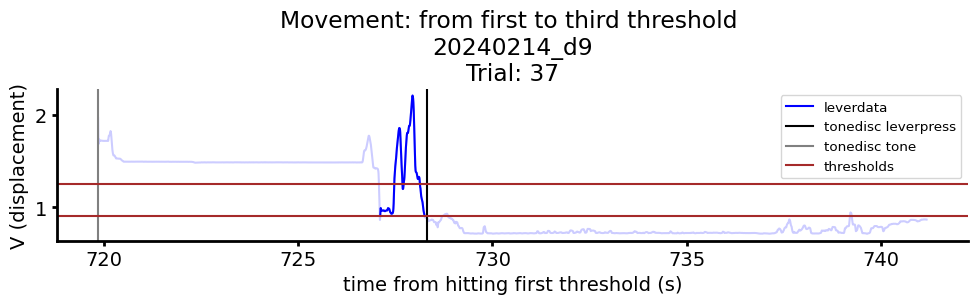

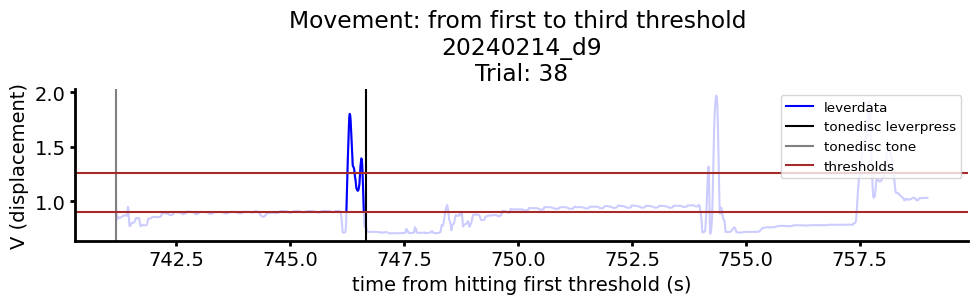

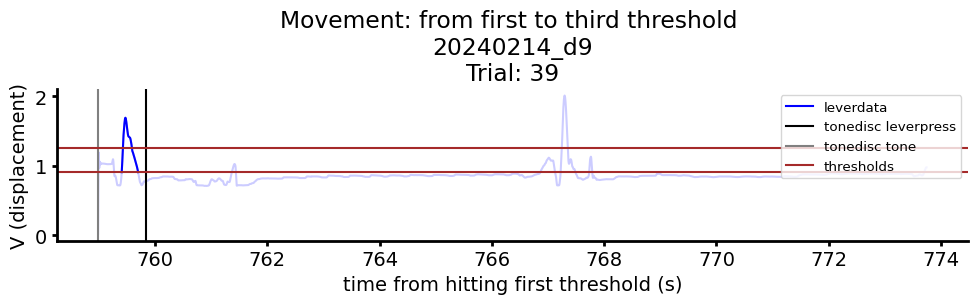

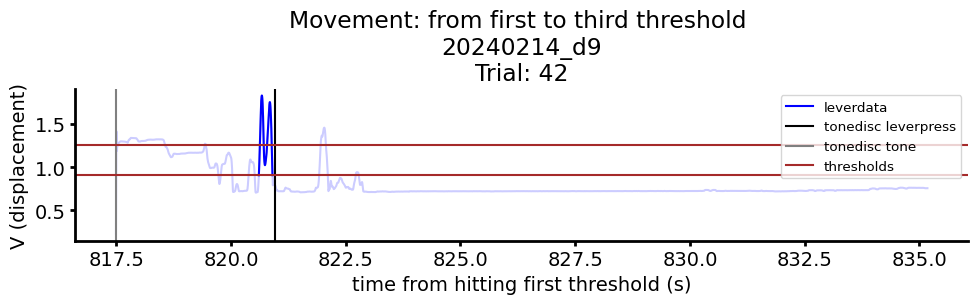

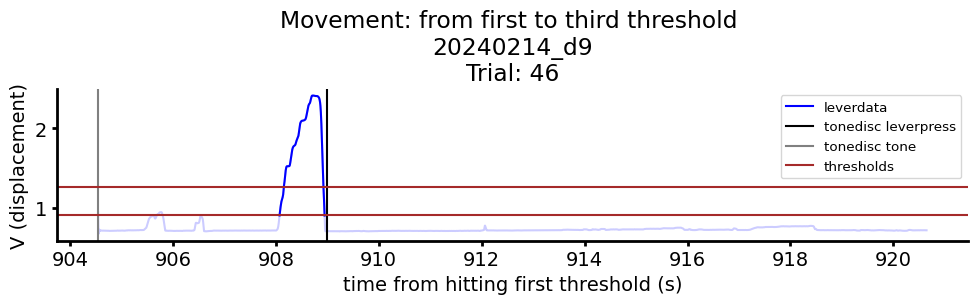

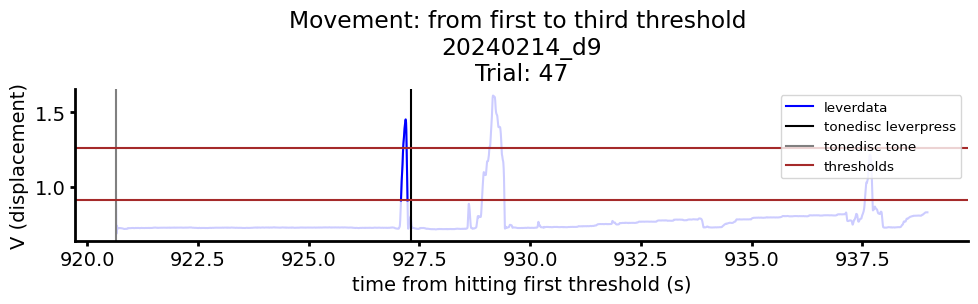

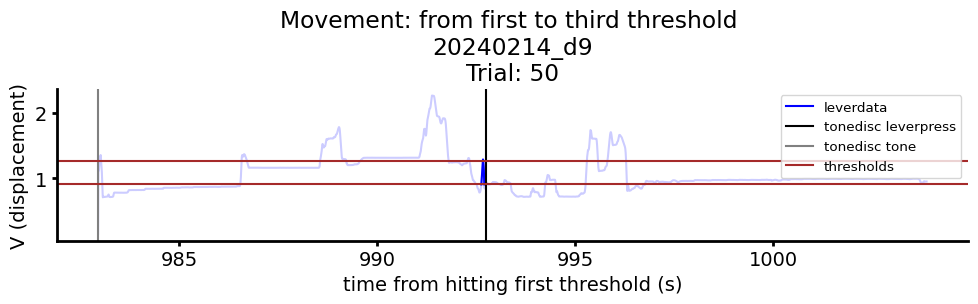

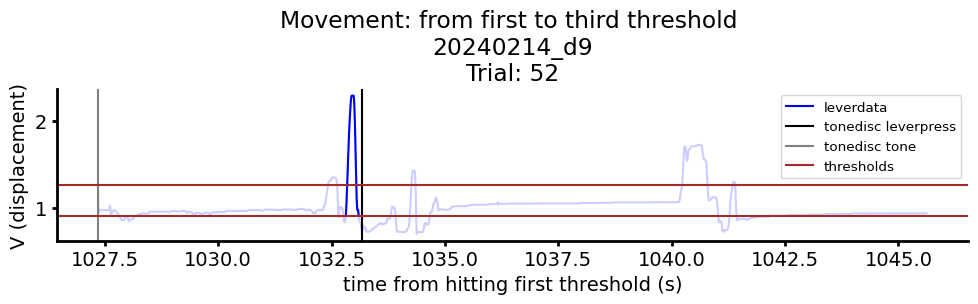

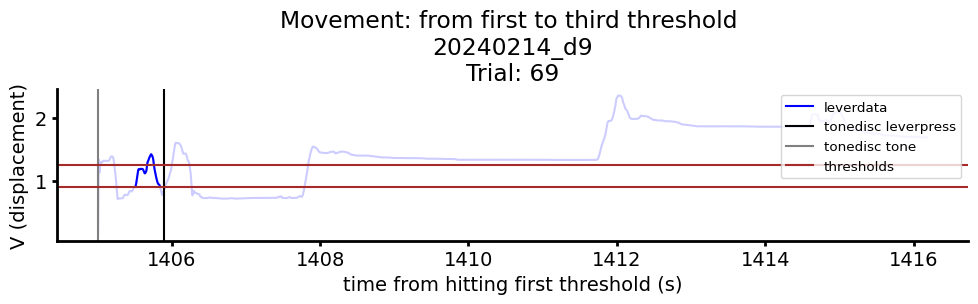

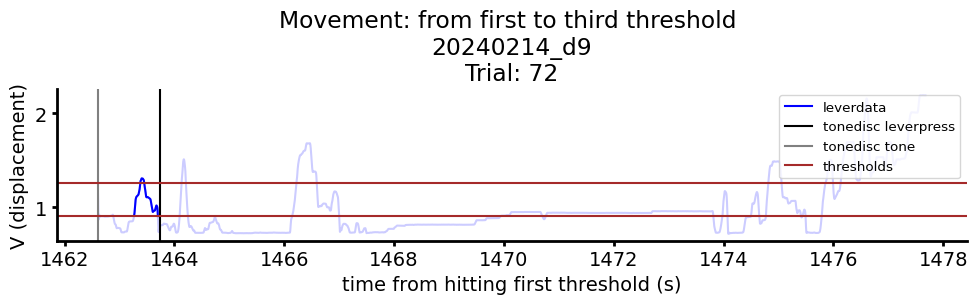

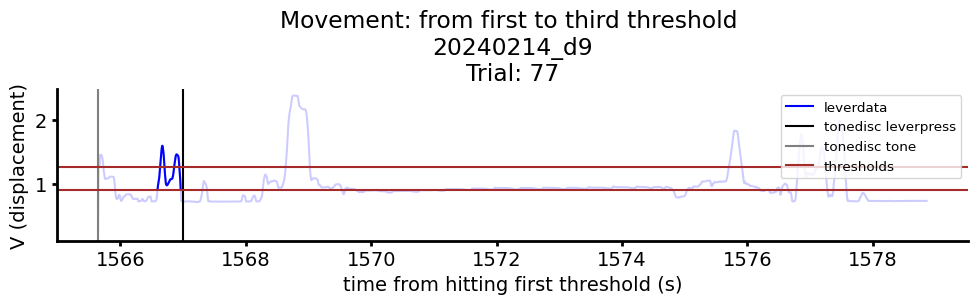

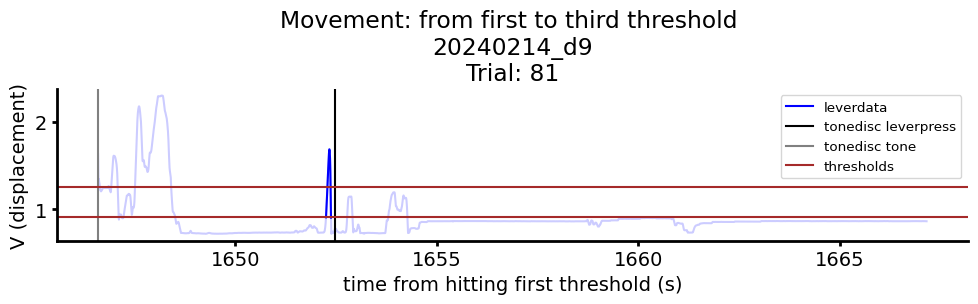

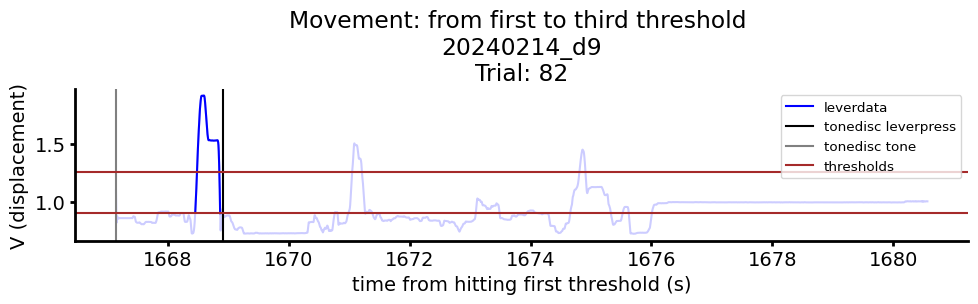

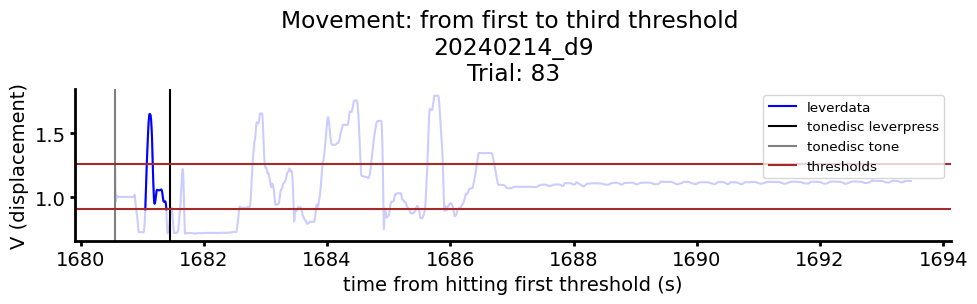

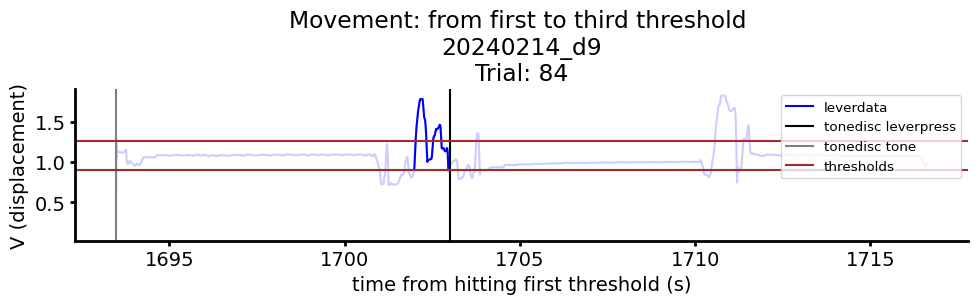

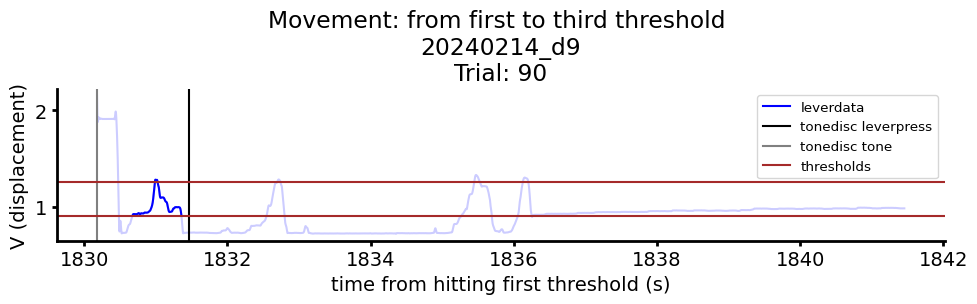

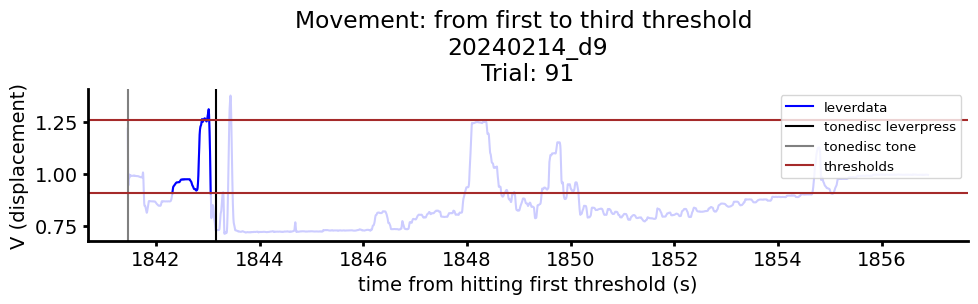

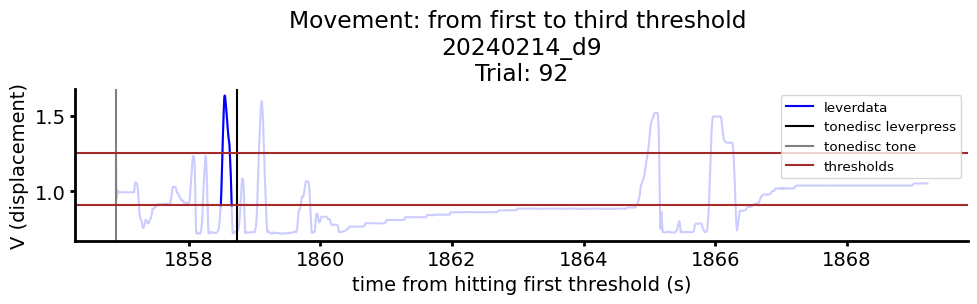

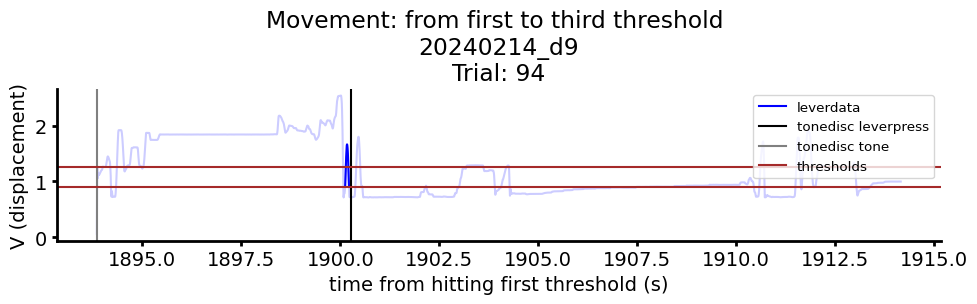

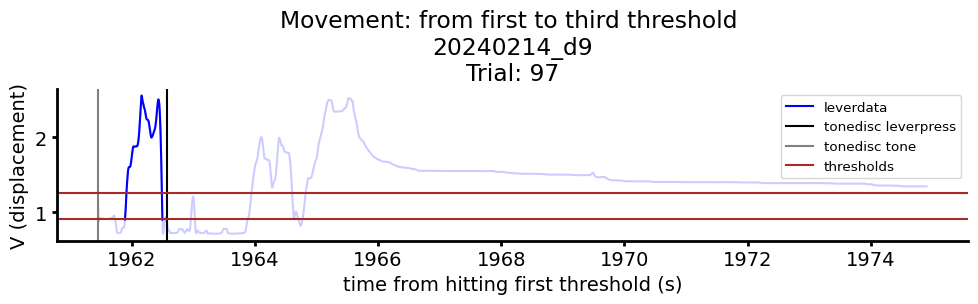

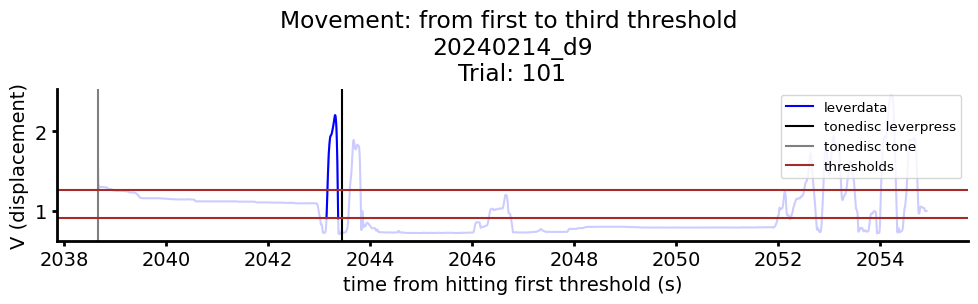

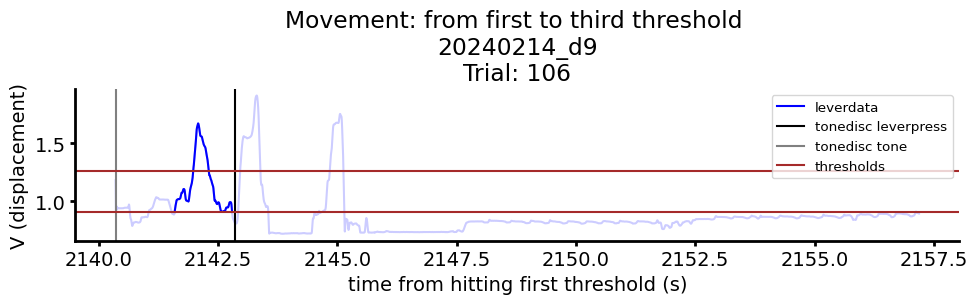

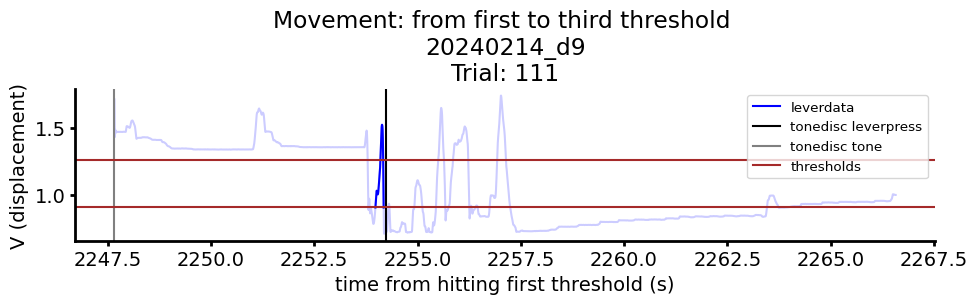

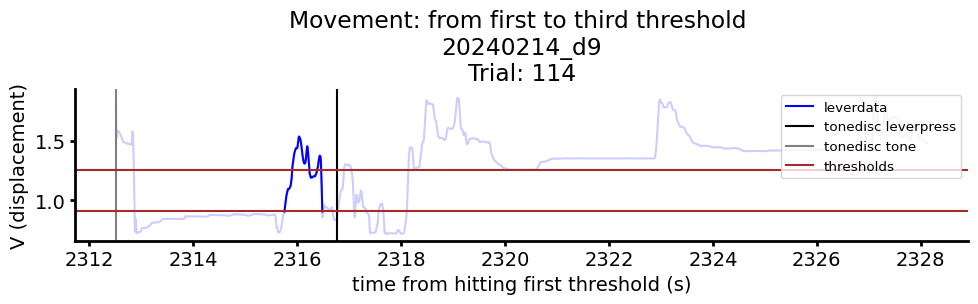

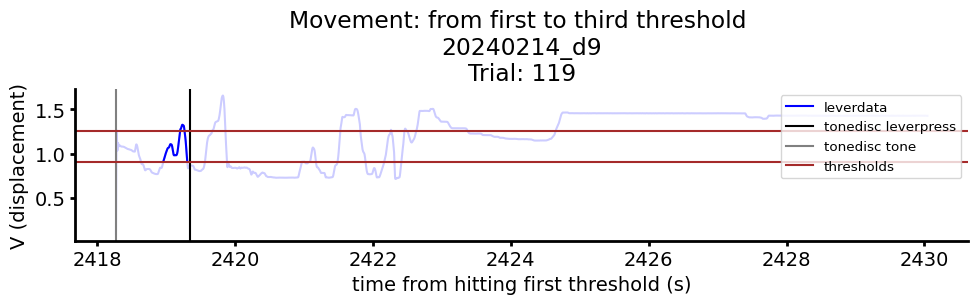

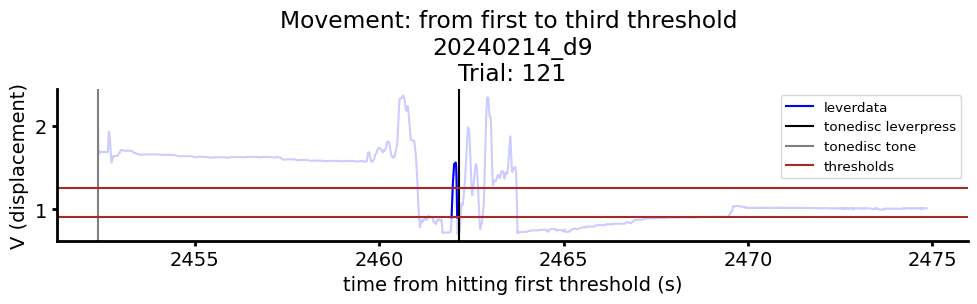

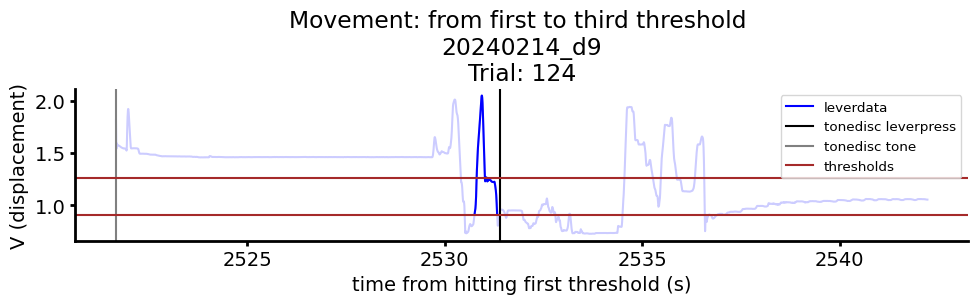

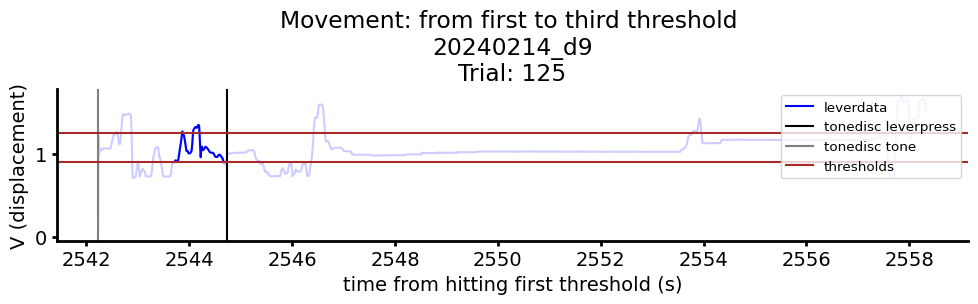

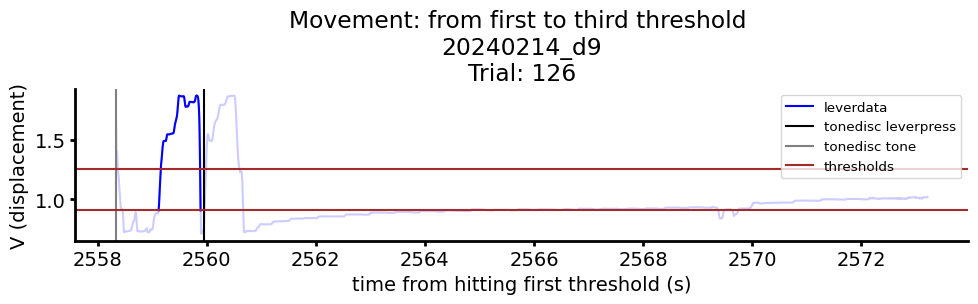

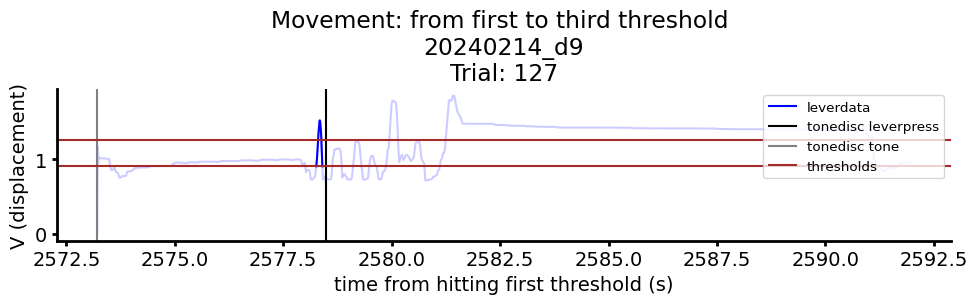

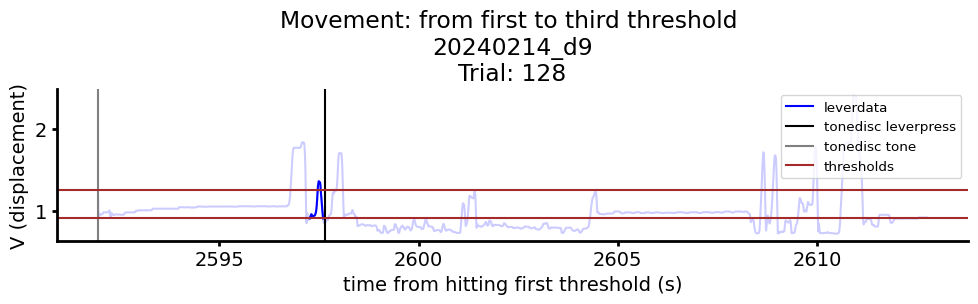

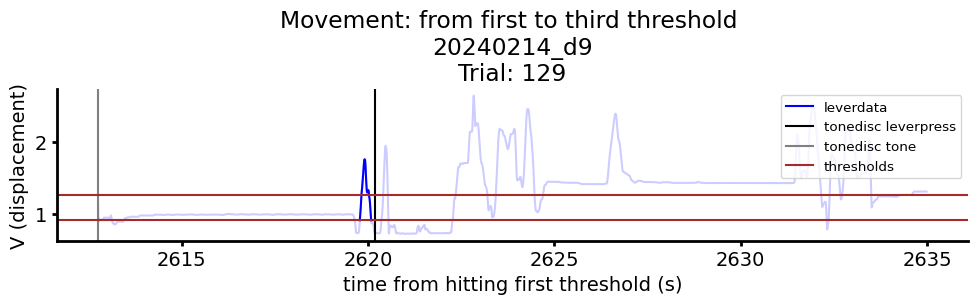

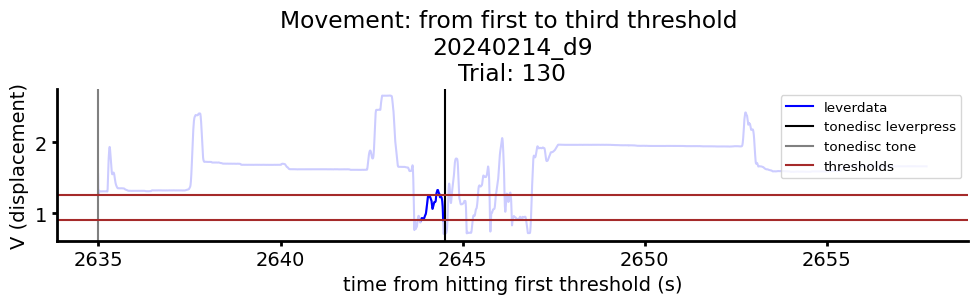

In [16]:
set_matplotlib_multiplot_settings()

leverdata_tone_indices = np.fromfile(PreprocessLeverData_folder+"tone_indices.bin", dtype=np.double)
leverdata_leverpress_indices = np.fromfile(PreprocessLeverData_folder+"leverpress_indices.bin", dtype=np.double)

movement_informations = np.load(HitMovements_folder+"leverpress_informations.npy")

for movement_information in movement_informations:
    trial_index = int(movement_information[0])

    leverdata = np.fromfile(PreprocessLeverData_folder+"processed_trial"+str(trial_index)+".bin", dtype=np.double)
    # jerk = np.load(Jerk_folder+"jerk_trial"+str(trial_index)+".npy")
    sample_times = np.fromfile(PreprocessLeverData_folder+"sample_times_trial"+str(trial_index)+".bin", dtype=np.double)
    tone_index = int(leverdata_tone_indices[trial_index])
    leverpress_index = int(leverdata_leverpress_indices[trial_index])
    
    left_index, right_index = movement_information[1:]
    left_index = int(left_index)
    right_index = int(right_index)
    plt.subplot(2,1,1)
    plt.plot(sample_times, leverdata, alpha=0.2, color='blue')
    plt.plot(sample_times[left_index:right_index+1], leverdata[left_index:right_index+1], color='blue', label='leverdata')
    plt.axvline(x=sample_times[int(leverpress_index)], color='black', label='tonedisc leverpress')
    plt.axvline(x=sample_times[int(tone_index)], color='gray', label='tonedisc tone')
    plt.axhline(y=movement_baseline + no_movement_threshold, label='thresholds', color='brown')
    plt.axhline(y=movement_baseline + movement_threshold, color='brown')
    plt.legend()
    plt.xlabel("time from hitting first threshold (s)")
    plt.ylabel("V (displacement)")
    plt.title("Movement: from first to third threshold \n"+session+"\nTrial: "+str(trial_index))

    # plt.subplot(2,1,2)
    # plt.plot(sample_times[1:], jerk, alpha=0.2, color='purple')
    # plt.plot(sample_times[left_index:right_index+1], jerk[left_index:right_index+1], color='purple', label='jerk')
    # plt.axvline(x=sample_times[int(leverpress_index)], color='black', label='tonedisc leverpress')
    # plt.axvline(x=sample_times[int(tone_index)], color='gray', label='tonedisc tone')
    # plt.axhline(y=movement_baseline + no_movement_threshold, label='thresholds', color='brown')
    # plt.axhline(y=movement_baseline + movement_threshold, color='brown')
    # plt.legend()
    # plt.xlabel("time from hitting first threshold (s)")
    # plt.ylabel("V/s^3")

    plt.savefig(output_folder+"plot_trial"+str(trial_index)+'.png')
    plt.show()

### Plot basic trial leverdata

In [17]:
# set_matplotlib_multiplot_settings()

# leverdata_tone_indices = np.fromfile(PreprocessLeverData_folder+"tone_indices.bin", dtype=np.double)
# leverdata_leverpress_indices = np.fromfile(PreprocessLeverData_folder+"leverpress_indices.bin", dtype=np.double)

# for trial_index in hit_trials:
#     leverdata = np.fromfile(PreprocessLeverData_folder+"processed_trial"+str(trial_index)+".bin", dtype=np.double)

#     sample_times = np.fromfile(PreprocessLeverData_folder+"sample_times_trial"+str(trial_index)+".bin", dtype=np.double)
#     tone_index = int(leverdata_tone_indices[trial_index])
#     leverpress_index = int(leverdata_leverpress_indices[trial_index])
    
#     plt.plot(sample_times, leverdata, color='blue', label='leverdata')
#     plt.axvline(x=sample_times[int(leverpress_index)], color='black', label='tonedisc leverpress')
#     plt.axvline(x=sample_times[int(tone_index)], color='gray', label='tonedisc tone')
#     plt.axhline(y=movement_baseline + no_movement_threshold, label='thresholds', color='brown')
#     plt.axhline(y=movement_baseline + movement_threshold, color='brown')
#     plt.legend()
#     plt.xlabel("time (s)")
#     plt.ylabel("V (displacement)")
#     plt.title("Movement\n"+session+"\nTrial: "+str(trial_index))

#     plt.savefig(output_folder+"plot_basic_trial"+str(trial_index)+'.png')
#     plt.show()